<a href="https://colab.research.google.com/github/NicolasSocquetJuglard/TP2_ML/blob/main/TP2_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from google.colab import files

In [2]:
#Load dataset

uploaded_heart = files.upload()

Saving heart.csv to heart.csv


  **PART 1**

In [3]:
#Displaying head of dataset

df = pd.read_csv('heart.csv', delimiter = ',')

df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

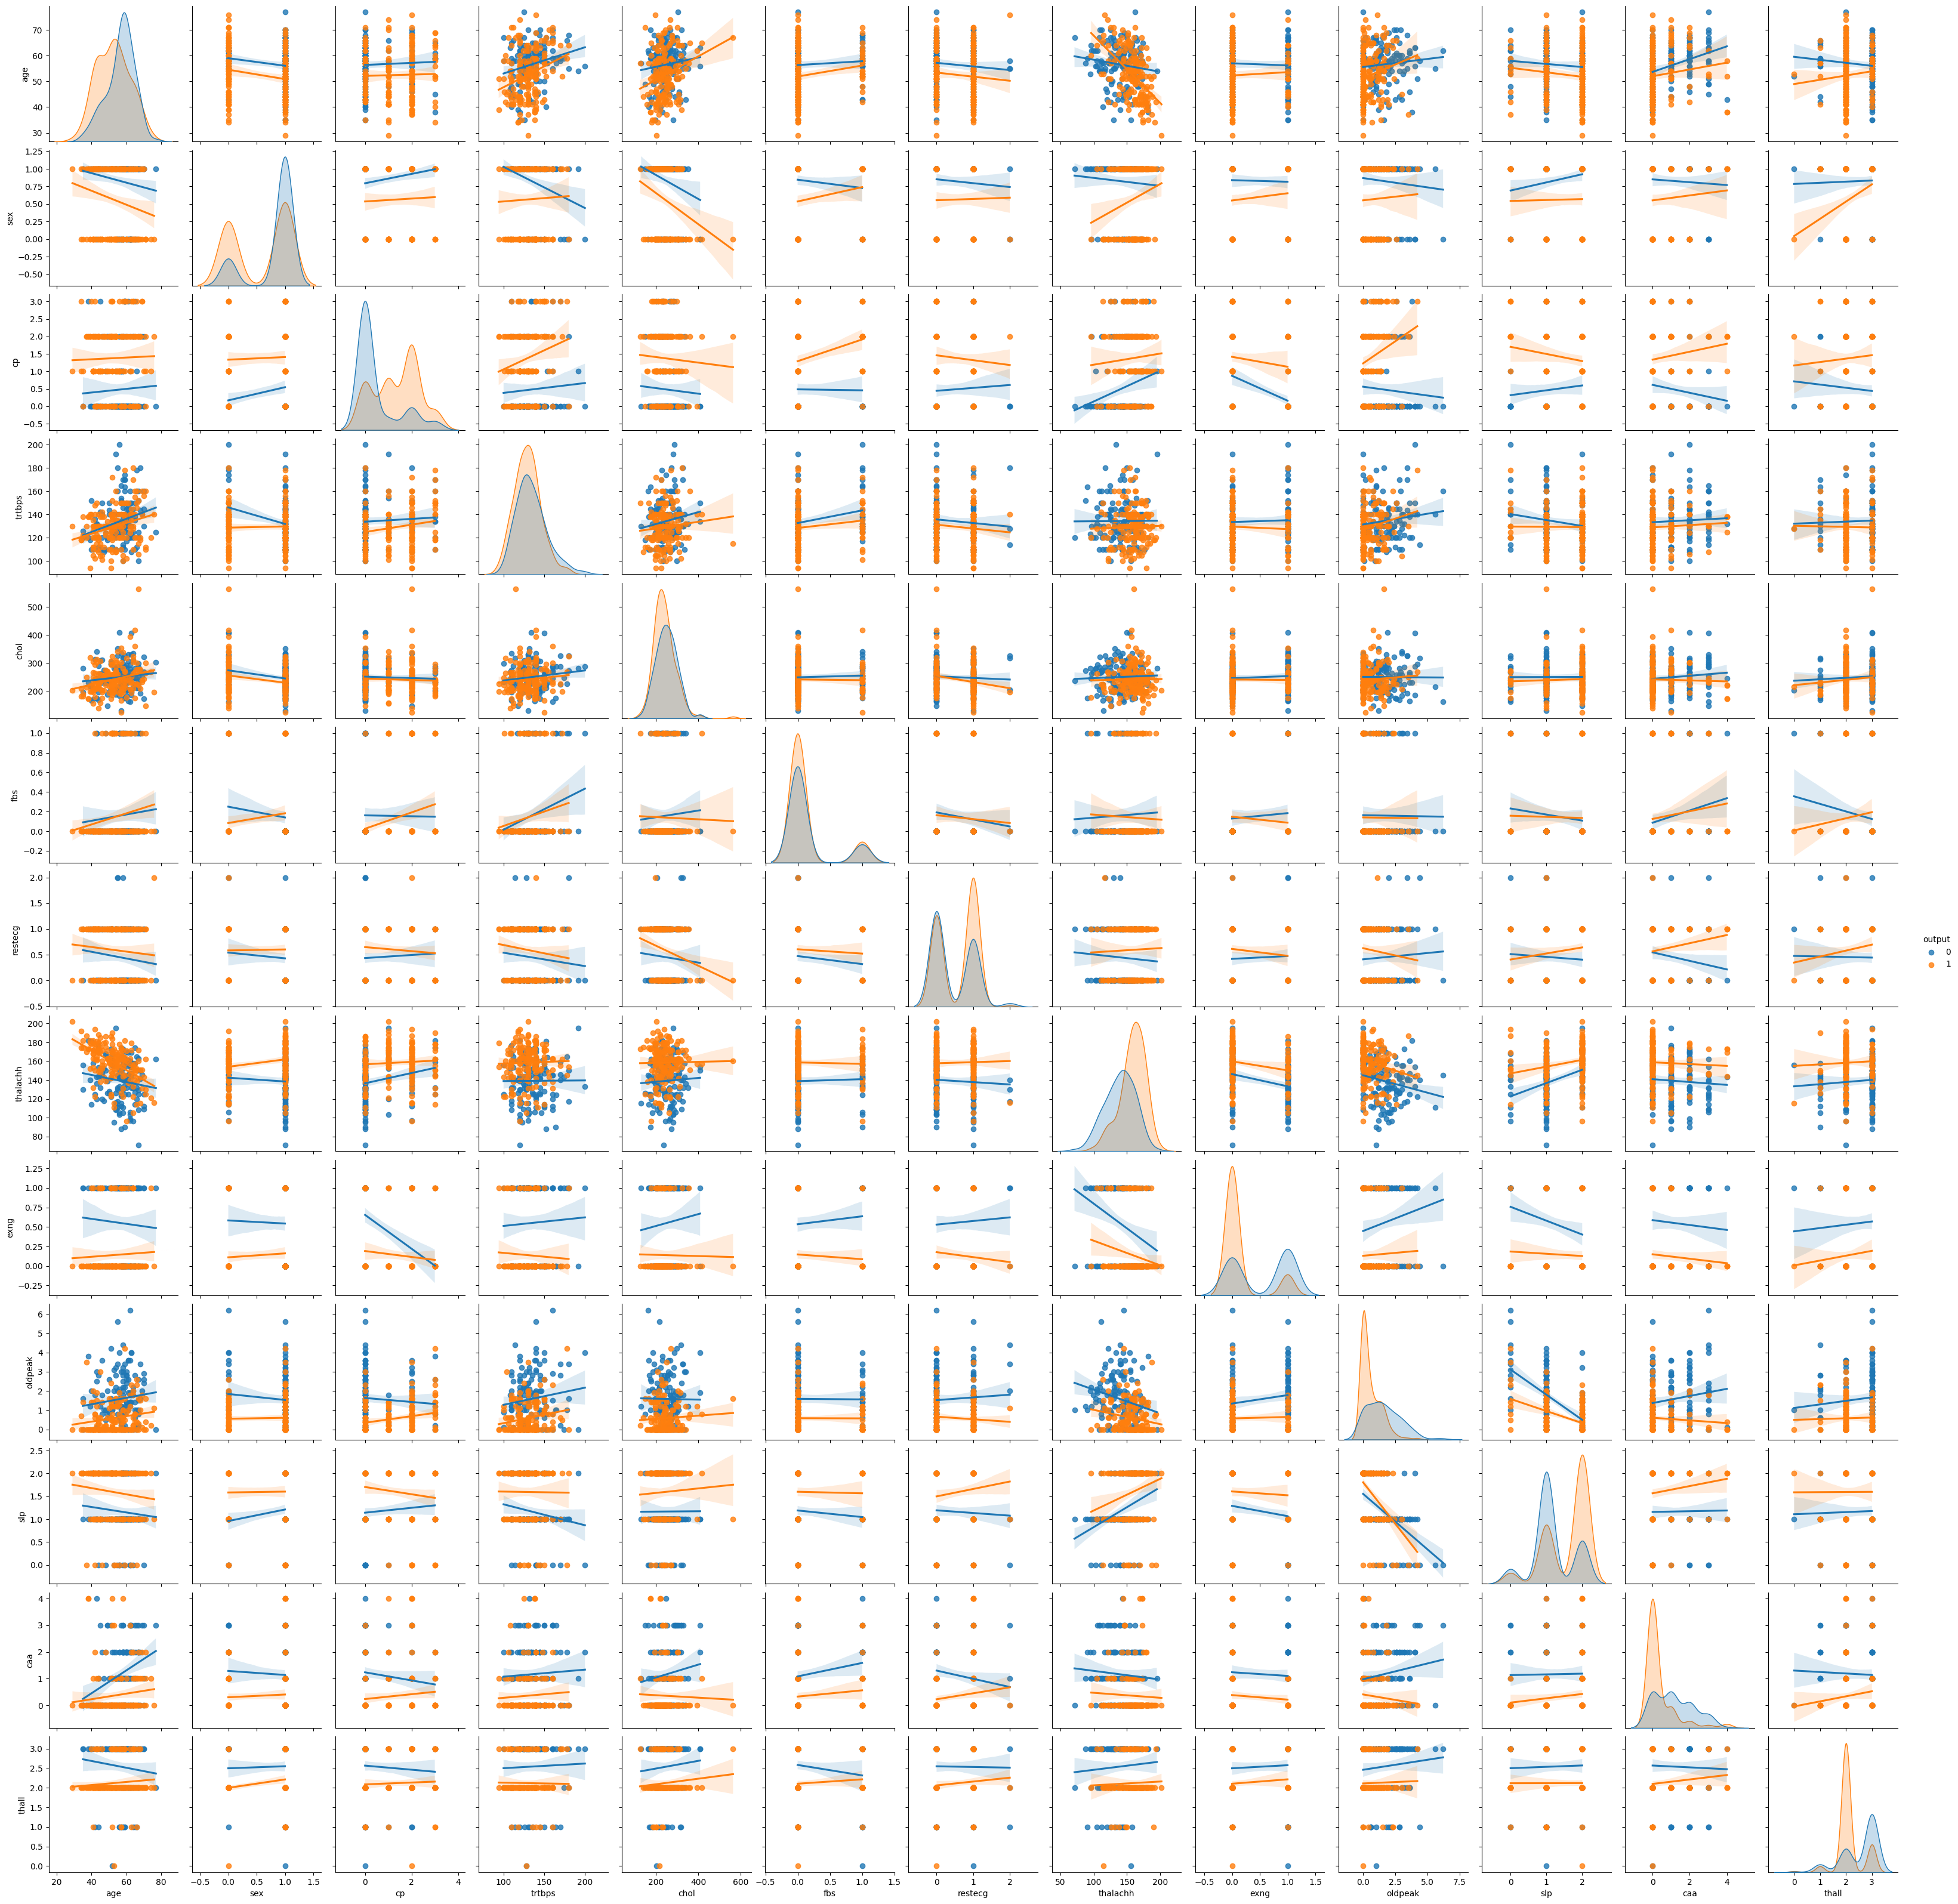

In [5]:
# Visualize the distribution of each feature on graph 

sb.pairplot(df, hue='output', kind="reg")

<Axes: >

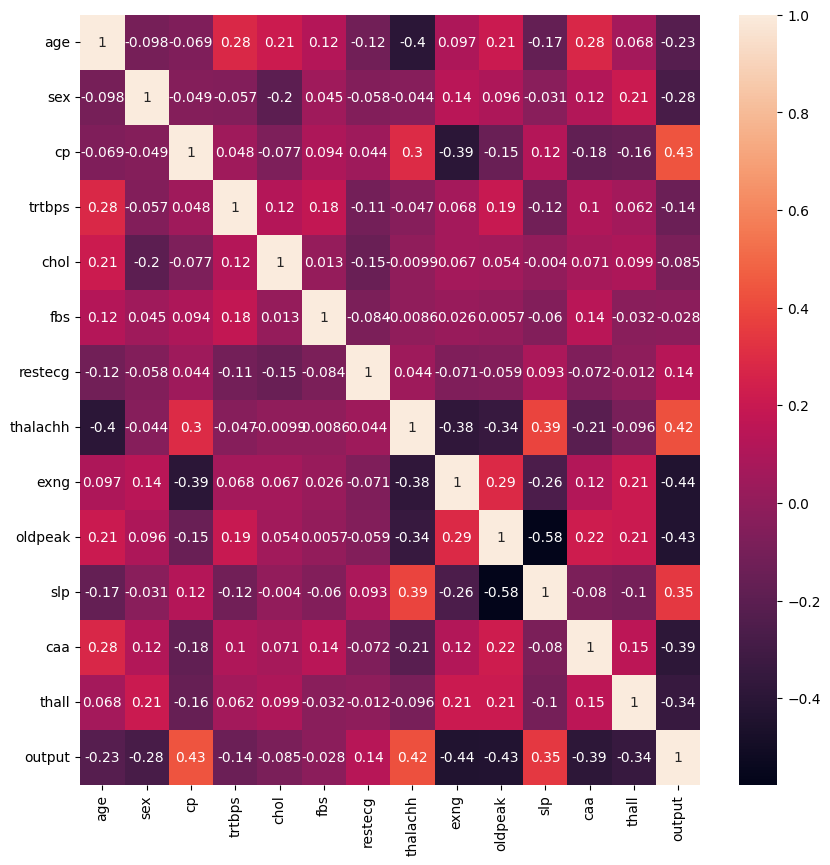

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
sb.heatmap(df.corr(), annot = True)

In [7]:
# Show the features in order of their correlation with the target (stress_level)
abs(df[df.columns[:]].corr()['output'][:]).sort_values(ascending=False).to_frame()

,output
output,1.000000
exng,0.436757
cp,0.433798
oldpeak,0.430696
thalachh,0.421741
caa,0.391724
slp,0.345877
thall,0.344029
sex,0.280937
age,0.225439


In [8]:
#Splitting dataset

X = df.drop(columns = ["fbs", "chol", "restecg", "trtbps"])
y = df["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, stratify = None)

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(242, 10) (242,)
(61, 10) (61,)


In [10]:
#Creating SVM model with default settings
from sklearn import svm

svm_classifier_default = svm.SVC()

#Preprocessing
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train, X_test = std_scale.transform(X_train), std_scale.transform(X_test)

svm_classifier_default.fit(X_train, y_train)

SVC()

In [11]:
#Predicting output

y_pred = svm_classifier_default.predict(X_test)

In [12]:
#Evalutation our model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuracy = round(accuracy_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)

mean_score = round(np.mean([accuracy, precision, f1]), 5)

print(f"Accuracy : {accuracy}\nPrecision : {precision}\nF1 score : {f1}\nMEAN SCORE : {mean_score}")

[[35  0]
 [ 0 26]]
Accuracy : 1.0
Precision : 1.0
F1 score : 1.0
MEAN SCORE : 1.0


**PART 2**

In [13]:
#Creating another model with manual settings
svm_classifier_manual = svm.SVC(kernel = "poly", C = 7)
svm_classifier_manual.fit(X_train, y_train)

#Predicting
y_pred = svm_classifier_manual.predict(X_test)

#Evaluating model
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuracy = round(accuracy_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)

mean_score = round(np.mean([accuracy, precision, f1]), 5)

print(f"Accuracy : {accuracy}\nPrecision : {precision}\nF1 score : {f1}\nMEAN SCORE : {mean_score}")

[[35  0]
 [ 0 26]]
Accuracy : 1.0
Precision : 1.0
F1 score : 1.0
MEAN SCORE : 1.0


**PART 3**

In [14]:
#Creating SVM model using GridSearchCV
from sklearn.model_selection  import GridSearchCV

svm_model = svm.SVC()

param_grid = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'C' : np.arange(1, 10)}
svm_classifier_grid = GridSearchCV(svm_model, param_grid, cv = 5)

svm_classifier_grid.fit(X_train, y_train)
print(svm_classifier_grid.best_params_)

{'C': 1, 'kernel': 'linear'}


In [15]:
y_pred = svm_classifier_grid.predict(X_test)

#Evaluating model
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuracy = round(accuracy_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)

mean_score = round(np.mean([accuracy, precision, f1]), 5)

print(f"Accuracy : {accuracy}\nPrecision : {precision}\nF1 score : {f1}\nMEAN SCORE : {mean_score}")

[[35  0]
 [ 0 26]]
Accuracy : 1.0
Precision : 1.0
F1 score : 1.0
MEAN SCORE : 1.0


**PART 4**

In [23]:
#Creating SVM model using RandomizedSearchCV
from numpy.random.mtrand import randint
from sklearn.model_selection  import RandomizedSearchCV

svm_model = svm.SVC()

param_random = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'C' : randint(1, 10)}
svm_classifier_random = RandomizedSearchCV(svm_model, param_grid, cv = 5)

svm_classifier_random.fit(X_train, y_train)
print(svm_classifier_random.best_params_)

{'kernel': 'rbf', 'C': 8}


In [17]:
y_pred = svm_classifier_random.predict(X_test)

#Evaluating model
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuracy = round(accuracy_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)

mean_score = round(np.mean([accuracy, precision, f1]), 5)

print(f"Accuracy : {accuracy}\nPrecision : {precision}\nF1 score : {f1}\nMEAN SCORE : {mean_score}")

[[35  0]
 [ 0 26]]
Accuracy : 1.0
Precision : 1.0
F1 score : 1.0
MEAN SCORE : 1.0


**PART 5**

In [30]:
#Return parameters for KNN and SVM models
def get_parameters():
  knn_parameters = {'n_neighbors' : [3, 5, 7],'weights': ['uniform', 'distance']}
  svm_parameters = {'C': [0.1, 1, 100, 1000], 'kernel' : ['linear', 'rbf', 'poly']}
  return knn_parameters, svm_parameters

In [19]:
#Function returning standardized training and testing datasets and taking as inputs dataframe, columns to drop for X and class y
def data_preprocessing(df, drop_columns, output):
  X = df.drop(columns = drop_columns)
  y = df['output']

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, stratify = None)

  std_scale = preprocessing.StandardScaler().fit(X_train)
  X_train, X_test = std_scale.transform(X_train), std_scale.transform(X_test)

  return X_train, X_test, y_train, y_test

In [29]:
#Function returning best KNN and SVM fit classifiers and taking as input training and testing data sets
def get_classifiers(X_train, X_test, y_train, y_test):
  knn_model = KNeighborsClassifier()  
  svm_model = svm.SVC()

  knn_parameters, svm_parameters = get_parameters()

  knn_grid = GridSearchCV(knn_model, knn_parameters, cv = 5).fit(X_train, y_train)
  svm_grid = GridSearchCV(svm_model, svm_parameters, cv = 5).fit(X_train, y_train)

  knn_classifier = knn_grid.best_estimator_
  svm_classifier = svm_grid.best_estimator_
  
  return knn_classifier, svm_classifier

In [27]:
#Function returning mean score of a model and taking as input desired model
def get_mean_score(model, X_test, y_test):
  y_pred = model.predict(X_test)
  mean_score = np.mean([accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)])
  return round(mean_score, 5)

In [31]:
def get_best_model(df, drop_columns, output):
  X_train, X_test, y_train, y_test = data_preprocessing(df, drop_columns, output)
  knn_classifier, svm_classifier = get_classifiers(X_train, X_test, y_train, y_test)
  mean_knn, mean_svm = get_mean_score(knn_classifier, X_test, y_test), get_mean_score(svm_classifier, X_test, y_test)
  
  best_model = None
  mesn_best = 0
  if mean_knn >= mean_svm:
    best_model = knn_classifier
    mean_best = mean_knn
  else:
    best_model = svm_classifier
    mean_best = mean_svm
  
  return best_model, mean_best

In [39]:
best_model, mean_best = get_best_model(df, ["fbs", "chol", "restecg", "trtbps"], ["output"])
print(f"Best model : {best_model.__class__.__name__}, \nMEAN SCORE : {mean_best}")

Best model : KNeighborsClassifier, 
MEAN SCORE : 1.0
